# Análisis de Datos de Tiendas - Grupo 4

### 1. Importar Librerías y Montar Drive

In [192]:
# Traemos la librería necesaria para extraer el Data Frame
#from google.colab import drive
#drive.mount('/content/drive')

In [193]:
# Demás librerías a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") #ignora mensajes de advertencia

### 2. Cargar el Dataset

In [194]:
# Definimos la ruta del archivo en Google Drive
nombre = "/content/drive/MyDrive/IDAT/dataset (1).txt"

# Cargamos el archivo en un DataFrame
#df = pd.read_csv(nombre)
df = pd.read_csv("dataset (1).txt")

# Mostramos el dataset
df

,ID,Store ID,Total Price,Base Price,Units Sold
0,1,8091,99.0375,111.8625,20
1,2,8091,99.0375,99.0375,28
2,3,8091,133.9500,133.9500,19
3,4,8091,133.9500,133.9500,44
4,5,8091,141.0750,141.0750,52
...,...,...,...,...,...
150145,212638,9984,235.8375,235.8375,38
150146,212639,9984,235.8375,235.8375,30
150147,212642,9984,357.6750,483.7875,31
150148,212643,9984,141.7875,191.6625,12


### 3. Exploración Inicial de los Datos

In [195]:
# Información general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           150150 non-null  int64  
 1   Store ID     150150 non-null  int64  
 2   Total Price  150149 non-null  float64
 3   Base Price   150150 non-null  float64
 4   Units Sold   150150 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 5.7 MB


In [ ]:
# Verificamos si hay valores nulos
df.isnull().sum()

ID             0
Store ID       0
Total Price    1
Base Price     0
Units Sold     0
dtype: int64

In [197]:
# Eliminamos valores nulos para mejorar la calidad del análisis
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150149 entries, 0 to 150149
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           150149 non-null  int64  
 1   Store ID     150149 non-null  int64  
 2   Total Price  150149 non-null  float64
 3   Base Price   150149 non-null  float64
 4   Units Sold   150149 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 6.9 MB


In [198]:
# Estadísticas descriptivas del dataset
df.describe()

,ID,Store ID,Total Price,Base Price,Units Sold
count,150149.000000,150149.000000,150149.000000,150149.000000,150149.000000
mean,106270.971795,9199.420935,206.626751,219.424262,51.674543
std,61385.825580,615.593192,103.308516,110.960204,60.207962
min,1.000000,8023.000000,41.325000,61.275000,1.000000
25%,53111.000000,8562.000000,130.387500,133.237500,20.000000
50%,106226.000000,9371.000000,198.075000,205.912500,35.000000
75%,159452.000000,9731.000000,233.700000,234.412500,62.000000
max,212644.000000,9984.000000,562.162500,562.162500,2876.000000


In [199]:
#Identificamos las tiendas únicas que existen
tiendas = df["Store ID"].unique()
tiendas

array([8091, 8095, 8094, 8063, 8023, 8058, 8222, 8121, 8218, 8317, 8319,
       8392, 8398, 8400, 8422, 8438, 8555, 8562, 8869, 8991, 8911, 9001,
       9043, 9092, 9112, 9132, 9147, 9164, 9178, 9190, 9221, 9250, 9273,
       9279, 9281, 9328, 9371, 9442, 9430, 9439, 9425, 9432, 9436, 9456,
       9479, 9481, 9490, 9498, 9532, 9578, 9672, 9611, 9613, 9632, 9680,
       9700, 9713, 9731, 9745, 9770, 9789, 9813, 9823, 9837, 9809, 9845,
       9872, 9876, 9879, 9880, 9881, 9890, 9909, 9954, 9961, 9984])

In [200]:
type(tiendas)

numpy.ndarray

In [201]:
# Convertimos el array a una lista para análisis adicionales
lista_de_tiendas = list(tiendas)

# Número total de tiendas únicas
len(lista_de_tiendas)

# Número total de tiendas únicas
num_tiendas = len(lista_de_tiendas)
print(f"Total de tiendas: {num_tiendas}")

Total de tiendas: 76


In [202]:
#Identifico el número de tiendas únicas
df["Store ID"].nunique()

76

Creación de DataFrames por Tienda

In [203]:
# Filtramos datos de la tienda con ID 8091
tienda_8091 = df[df["Store ID"]==8091]
tienda_8091

,ID,Store ID,Total Price,Base Price,Units Sold
0,1,8091,99.0375,111.8625,20
1,2,8091,99.0375,99.0375,28
2,3,8091,133.9500,133.9500,19
3,4,8091,133.9500,133.9500,44
4,5,8091,141.0750,141.0750,52
...,...,...,...,...,...
148999,211007,8091,173.1375,173.1375,25
149000,211011,8091,218.7375,218.7375,15
149001,211012,8091,341.2875,341.2875,35
149002,211015,8091,233.7000,233.7000,30


In [204]:
# Ordenamos por "Total Price" en orden descendente
tienda_8091.sort_values(by="Total Price", ascending=False, inplace = True)
tienda_8091

,ID,Store ID,Total Price,Base Price,Units Sold
142071,201181,8091,341.2875,341.2875,43
143226,202820,8091,341.2875,341.2875,43
140916,199550,8091,341.2875,341.2875,41
144381,204457,8091,341.2875,341.2875,42
139761,197911,8091,341.2875,341.2875,42
...,...,...,...,...,...
39270,55562,8091,86.9250,86.9250,32
17325,24515,8091,86.2125,104.0250,7
16170,22875,8091,86.2125,104.0250,39
42735,60440,8091,84.7875,84.7875,18


In [205]:
# Contamos la cantidad de productos únicos en el dataset
numero_de_productos = df['Base Price'].nunique()
numero_de_productos

572

In [206]:
#for i in lista_de_tiendas:
#  global tienda_i
#  tienda_i = df[df["Store ID"]==i]
#  tienda_i.sort_values(by="Total Price", ascending=False)
#  print(tienda_i)

### Visualización de Datos

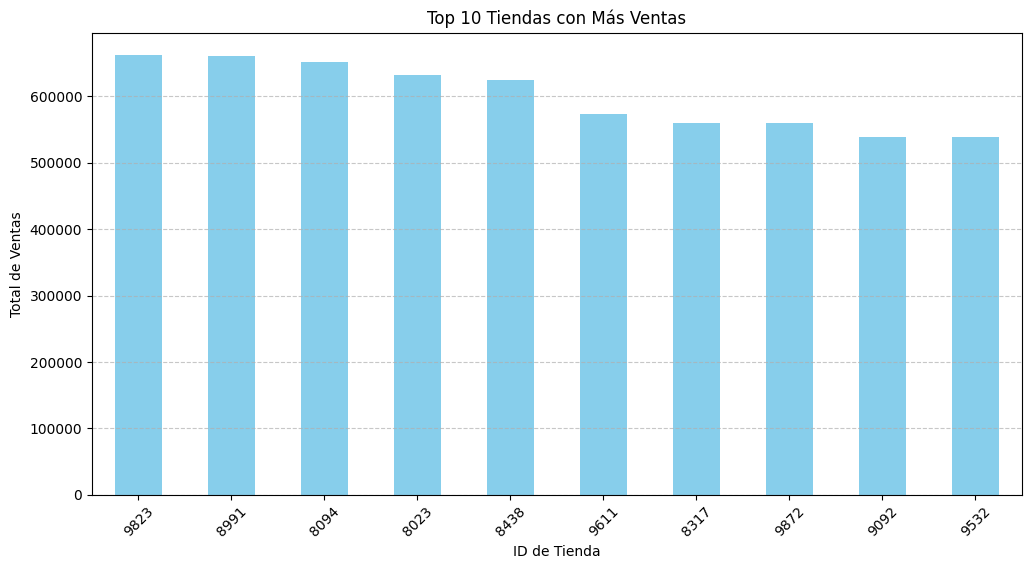

In [207]:
plt.figure(figsize=(12, 6))

# Agrupar y ordenar las ventas totales por tienda
ventas_por_tienda = df.groupby("Store ID")["Total Price"].sum().sort_values(ascending=False)

# Filtrar solo las x tiendas con más ventas
top_n = 10  # Cambiar este valor según se necesite
ventas_top = ventas_por_tienda.head(top_n)

# Graficar
ventas_top.plot(kind="bar", color="skyblue")
plt.title(f"Top {top_n} Tiendas con Más Ventas")
plt.xlabel("ID de Tienda")
plt.ylabel("Total de Ventas")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

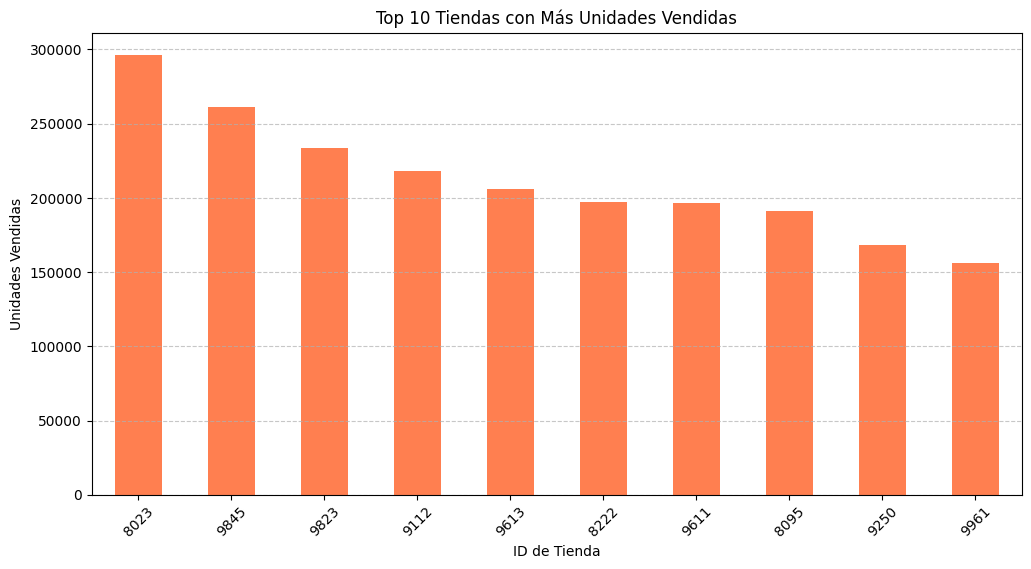

In [208]:
plt.figure(figsize=(12, 6))

# Agrupar y ordenar las unidades vendidas por tienda
unidades_por_tienda = df.groupby("Store ID")["Units Sold"].sum().sort_values(ascending=False)

# Filtrar solo las x tiendas con más ventas
top_n = 10  # Cambiar este valor según se necesite
unidades_top = unidades_por_tienda.head(top_n)

# Graficar
unidades_top.plot(kind="bar", color="coral")
plt.title(f"Top {top_n} Tiendas con Más Unidades Vendidas")
plt.xlabel("ID de Tienda")
plt.ylabel("Unidades Vendidas")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

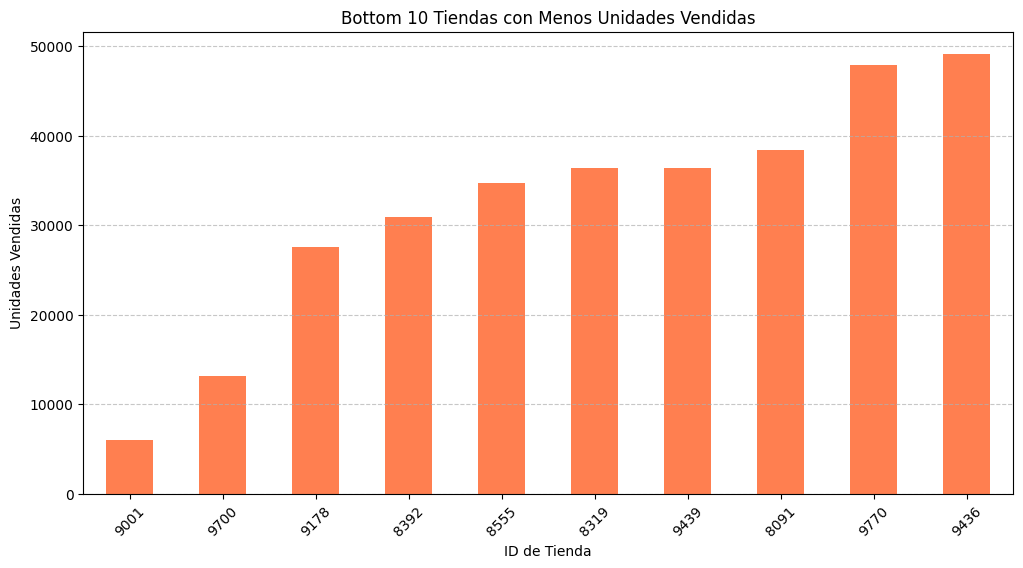

In [209]:
plt.figure(figsize=(12, 6))

# Agrupar y ordenar las unidades vendidas por tienda (de menor a mayor)
unidades_por_tienda = df.groupby("Store ID")["Units Sold"].sum().sort_values(ascending=True)

# Filtrar solo las x tiendas con menos ventas
bottom_n = 10  # Puedes ajustar este valor
unidades_peores = unidades_por_tienda.head(bottom_n)

# Graficar
unidades_peores.plot(kind="bar", color="coral")
plt.title(f"Bottom {bottom_n} Tiendas con Menos Unidades Vendidas")
plt.xlabel("ID de Tienda")
plt.ylabel("Unidades Vendidas")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

<Axes: xlabel='Total Price', ylabel='Units Sold'>

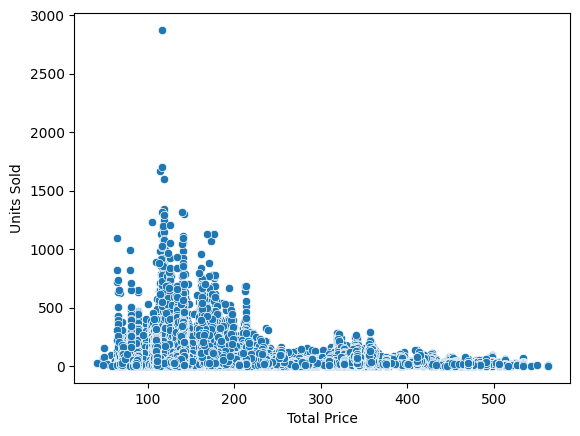

In [210]:
sns.scatterplot(x=df["Total Price"], y=df["Units Sold"])

In [211]:
#Cómo crear un data Frame por tienda
tienda_8023 = df[df["Store ID"]==8023]
tienda_8023

,ID,Store ID,Total Price,Base Price,Units Sold
70,93,8023,98.3250,88.3500,233
71,94,8023,98.3250,88.3500,256
72,95,8023,98.3250,98.3250,52
73,96,8023,184.5375,321.3375,18
74,98,8023,133.9500,133.9500,58
...,...,...,...,...,...
149081,211116,8023,355.5375,469.5375,85
149082,211117,8023,359.1000,469.5375,149
149083,211118,8023,533.6625,533.6625,15
149084,211119,8023,141.7875,177.4125,203


<Axes: xlabel='Total Price', ylabel='Units Sold'>

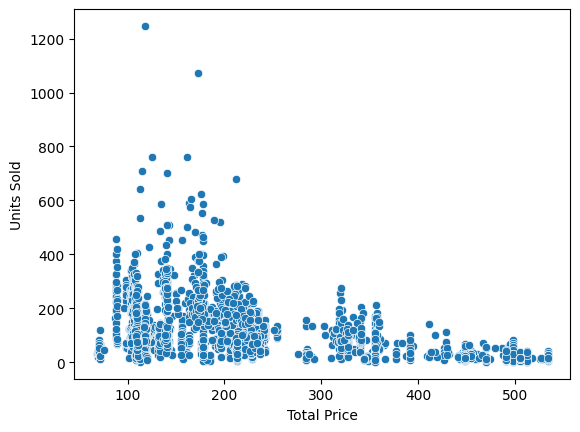

In [212]:
sns.scatterplot(x=tienda_8023["Total Price"], y=tienda_8023["Units Sold"])

In [213]:
tienda_8023.describe()

,ID,Store ID,Total Price,Base Price,Units Sold
count,2730.000000,2730.0,2730.000000,2730.000000,2730.000000
mean,105563.826374,8023.0,231.463063,247.386525,108.600000
std,61394.747233,0.0,123.882801,131.902317,101.251594
min,93.000000,8023.0,68.400000,68.400000,1.000000
25%,52421.250000,8023.0,132.525000,133.950000,33.000000
50%,105512.500000,8023.0,205.912500,213.037500,81.000000
75%,158753.750000,8023.0,321.337500,327.037500,160.000000
max,211121.000000,8023.0,533.662500,533.662500,1247.000000


In [214]:
#Cómo crear un data Frame por tienda
tienda_9001 = df[df["Store ID"]==9001]
tienda_9001

,ID,Store ID,Total Price,Base Price,Units Sold
344,474,9001,97.6125,97.6125,14
345,482,9001,213.0375,213.0375,29
1499,2112,9001,99.0375,99.0375,7
1500,2120,9001,213.0375,213.0375,19
2654,3749,9001,99.0375,99.0375,12
...,...,...,...,...,...
147030,208204,9001,189.5250,233.7000,57
148184,209835,9001,110.4375,110.4375,3
148185,209843,9001,184.5375,233.7000,39
149339,211476,9001,110.4375,110.4375,2


<Axes: xlabel='Total Price', ylabel='Units Sold'>

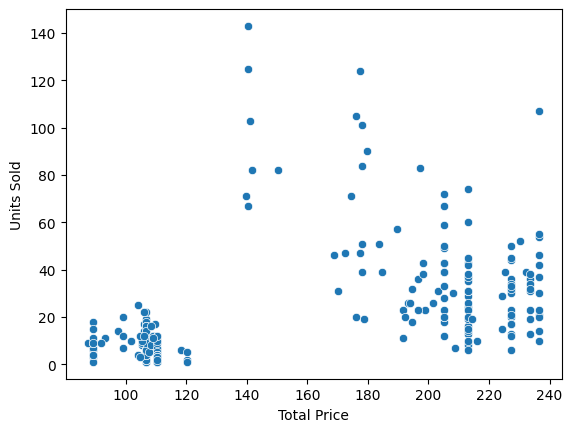

In [215]:
sns.scatterplot(x=tienda_9001["Total Price"], y=tienda_9001["Units Sold"])

In [216]:
tienda_9001.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260 entries, 344 to 149340
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           260 non-null    int64  
 1   Store ID     260 non-null    int64  
 2   Total Price  260 non-null    float64
 3   Base Price   260 non-null    float64
 4   Units Sold   260 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 12.2 KB


In [217]:
tienda_9001.describe()

,ID,Store ID,Total Price,Base Price,Units Sold
count,260.000000,260.0,260.000000,260.000000,260.000000
mean,105933.742308,9001.0,156.615721,162.318462,23.280769
std,61502.020347,0.0,54.111577,55.303457,23.952052
min,474.000000,9001.0,87.637500,89.062500,1.000000
25%,52787.000000,9001.0,106.875000,106.875000,8.000000
50%,105883.500000,9001.0,130.031250,156.037500,14.000000
75%,159122.000000,9001.0,213.037500,213.037500,31.250000
max,211484.000000,9001.0,236.550000,236.550000,143.000000


In [218]:
#Cómo crear un data Frame por tienda
tienda_9001 = df[df["Store ID"]==9001]
tienda_9001

,ID,Store ID,Total Price,Base Price,Units Sold
344,474,9001,97.6125,97.6125,14
345,482,9001,213.0375,213.0375,29
1499,2112,9001,99.0375,99.0375,7
1500,2120,9001,213.0375,213.0375,19
2654,3749,9001,99.0375,99.0375,12
...,...,...,...,...,...
147030,208204,9001,189.5250,233.7000,57
148184,209835,9001,110.4375,110.4375,3
148185,209843,9001,184.5375,233.7000,39
149339,211476,9001,110.4375,110.4375,2


In [219]:
tienda_9845 = df[df["Store ID"]==9845]
tienda_9845

,ID,Store ID,Total Price,Base Price,Units Sold
980,1400,9845,98.3250,106.1625,239
981,1401,9845,98.3250,106.8750,268
982,1402,9845,98.3250,98.3250,74
983,1405,9845,131.8125,131.8125,77
984,1406,9845,133.9500,133.9500,101
...,...,...,...,...,...
149987,212423,9845,231.5625,231.5625,124
149988,212424,9845,236.5500,236.5500,48
149989,212426,9845,360.5250,469.5375,67
149990,212427,9845,359.8125,469.5375,114


In [220]:
#Creamos un data frame cada tienda
df_ordenado = df.sort_values(by="Store ID", ascending=False)
df_ordenado

,ID,Store ID,Total Price,Base Price,Units Sold
150133,212622,9984,87.6375,87.6375,52
150149,212644,9984,234.4125,234.4125,15
150148,212643,9984,141.7875,191.6625,12
150147,212642,9984,357.6750,483.7875,31
76227,107854,9984,469.5375,469.5375,10
...,...,...,...,...,...
81,108,8023,205.9125,205.9125,26
8175,11557,8023,320.6250,320.6250,13
8174,11555,8023,177.4125,177.4125,36
76320,107975,8023,355.5375,355.5375,19


In [221]:
for i in lista_de_tiendas:
  print(i)

8091
8095
8094
8063
8023
8058
8222
8121
8218
8317
8319
8392
8398
8400
8422
8438
8555
8562
8869
8991
8911
9001
9043
9092
9112
9132
9147
9164
9178
9190
9221
9250
9273
9279
9281
9328
9371
9442
9430
9439
9425
9432
9436
9456
9479
9481
9490
9498
9532
9578
9672
9611
9613
9632
9680
9700
9713
9731
9745
9770
9789
9813
9823
9837
9809
9845
9872
9876
9879
9880
9881
9890
9909
9954
9961
9984


In [222]:
for i in lista_de_tiendas:
  # Use .any() to check if the condition is True for any row in the Series
  if (df["Store ID"] == i).any():
    tienda_i = df[df["Store ID"]==i]
    tienda_i.sort_values(by="Total Price", ascending=False, inplace=True) # Sort in place

tienda_i

,ID,Store ID,Total Price,Base Price,Units Sold
140907,199538,9984,483.7875,483.7875,10
138597,196255,9984,471.6750,471.6750,12
49662,70228,9984,469.5375,469.5375,19
115497,163569,9984,469.5375,469.5375,12
34647,49048,9984,469.5375,469.5375,17
...,...,...,...,...,...
123570,174976,9984,67.6875,89.0625,26
54269,76756,9984,67.6875,86.9250,53
3448,4890,9984,67.6875,89.0625,14
70440,99716,9984,66.9750,86.2125,43


In [223]:
#Precio medio de todas las todas las tiendas
# Crear un diccionario para almacenar cada DataFrame
tiendas = {}

for i in lista_de_tiendas:
    if (df["Store ID"] == i).any():
        tienda_i = df[df["Store ID"] == i].sort_values(by="Total Price", ascending=False)
        tiendas[f"tienda_{i}"] = tienda_i  # Guardar el DataFrame en el diccionario con la clave 'tienda_i'

tiendas["tienda_9954"]

,ID,Store ID,Total Price,Base Price,Units Sold
140873,199487,9954,483.7875,483.7875,16
140872,199486,9954,483.7875,483.7875,4
140874,199488,9954,483.7875,483.7875,20
60022,84926,9954,469.5375,469.5375,16
77347,109440,9954,469.5375,469.5375,7
...,...,...,...,...,...
48459,68524,9954,68.4000,68.4000,66
43839,61995,9954,67.6875,67.6875,56
70404,99666,9954,66.9750,89.0625,65
6886,9768,9954,66.9750,223.7250,31


In [224]:
print(tiendas)

{'tienda_8091':             ID  Store ID  Total Price  Base Price  Units Sold
142071  201181      8091     341.2875    341.2875          43
143226  202820      8091     341.2875    341.2875          43
140916  199550      8091     341.2875    341.2875          41
144381  204457      8091     341.2875    341.2875          42
139761  197911      8091     341.2875    341.2875          42
...        ...       ...          ...         ...         ...
39270    55562      8091      86.9250     86.9250          32
17325    24515      8091      86.2125    104.0250           7
16170    22875      8091      86.2125    104.0250          39
42735    60440      8091      84.7875     84.7875          18
42736    60441      8091      82.6500     82.6500          21

[1170 rows x 5 columns], 'tienda_8095':           ID  Store ID  Total Price  Base Price  Units Sold
33520  47454      8095     533.6625    533.6625          12
31209  44191      8095     533.6625    533.6625          11
34674  49087      8

In [225]:
ventas_totales = {}  # Un diccionario para almacenar las ventas totales por tienda

for i in lista_de_tiendas:
    if (df["Store ID"] == i).any():
        # Filtrar las filas correspondientes a la tienda actual
        tienda_i = df[df["Store ID"] == i]

        # Calcular las ventas totales sumando el producto de 'Total Price' y 'Units Sold'
        ventas_totales[f"tienda_{i}"] = (tienda_i["Total Price"] * tienda_i["Units Sold"]).sum()

        # Ordenar la tienda por 'Total Price' y guardar en el diccionario tiendas
        tienda_i = tienda_i.sort_values(by="Total Price", ascending=False)
        tiendas[f"tienda_{i}"] = tienda_i

# Mostrar el diccionario con las ventas totales por tienda
ventas_totales


{'tienda_8091': np.float64(6509571.0),
 'tienda_8095': np.float64(33199392.075),
 'tienda_8094': np.float64(23223947.475),
 'tienda_8063': np.float64(16521538.35),
 'tienda_8023': np.float64(53737210.275),
 'tienda_8058': np.float64(18617850.862499997),
 'tienda_8222': np.float64(34849420.237500004),
 'tienda_8121': np.float64(17163550.725),
 'tienda_8218': np.float64(8322467.399999999),
 'tienda_8317': np.float64(25851610.424999997),
 'tienda_8319': np.float64(7170564.375),
 'tienda_8392': np.float64(5650588.124999999),
 'tienda_8398': np.float64(24853570.35),
 'tienda_8400': np.float64(17459226.1125),
 'tienda_8422': np.float64(14791458.674999999),
 'tienda_8438': np.float64(26640062.2125),
 'tienda_8555': np.float64(6131739.375),
 'tienda_8562': np.float64(27187983.975),
 'tienda_8869': np.float64(26756638.6125),
 'tienda_8991': np.float64(24751505.4375),
 'tienda_8911': np.float64(11774144.4375),
 'tienda_9001': np.float64(1100220.4125),
 'tienda_9043': np.float64(14220652.125),
 '

Ventas

In [226]:
# Convertir el diccionario en un DataFrame para facilitar la manipulación
ventas_totales_df = pd.DataFrame(list(ventas_totales.items()), columns=["Tienda", "Ventas Totales"])

# Ordenar el DataFrame por las ventas totales en orden descendente
top_5_tiendas = ventas_totales_df.sort_values(by="Ventas Totales", ascending=False).head(5)

# Mostrar el top 10 de tiendas
print(top_5_tiendas)

         Tienda  Ventas Totales
4   tienda_8023    5.373721e+07
65  tienda_9845    4.506128e+07
62  tienda_9823    4.370332e+07
24  tienda_9112    3.679961e+07
51  tienda_9611    3.520043e+07


In [227]:
top_5_tiendas

,Tienda,Ventas Totales
4,tienda_8023,5.373721e+07
65,tienda_9845,4.506128e+07
62,tienda_9823,4.370332e+07
24,tienda_9112,3.679961e+07
51,tienda_9611,3.520043e+07


Text(0, 0.5, 'Ventas Totales')

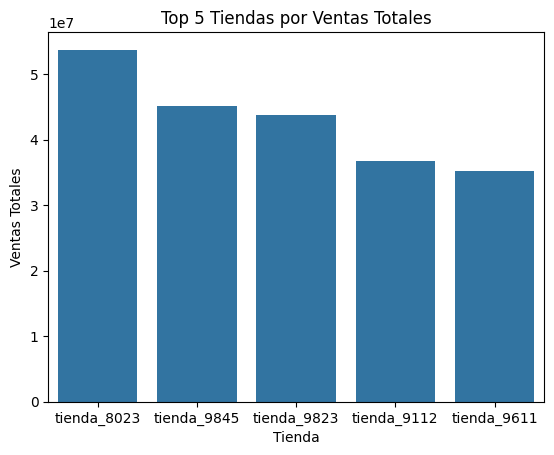

In [228]:
sns.barplot(x="Tienda", y="Ventas Totales", data=top_5_tiendas)
plt.title("Top 5 Tiendas por Ventas Totales")
plt.xlabel("Tienda")
plt.ylabel("Ventas Totales")

In [229]:
#5 peores
# Convertir el diccionario en un DataFrame para facilitar la manipulación
# Ordenar el DataFrame por las ventas totales en orden descendente
menos_5_tiendas = ventas_totales_df.sort_values(by="Ventas Totales", ascending=False).tail(5)

# Mostrar el top 10 de tiendas
print(menos_5_tiendas)

         Tienda  Ventas Totales
39  tienda_9439    5.865715e+06
11  tienda_8392    5.650588e+06
28  tienda_9178    5.508588e+06
55  tienda_9700    2.314119e+06
21  tienda_9001    1.100220e+06


Text(0, 0.5, 'Ventas Totales')

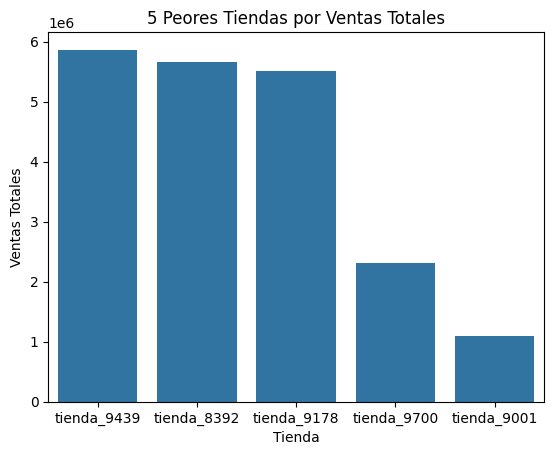

In [230]:
sns.barplot(x="Tienda", y="Ventas Totales", data=menos_5_tiendas)
plt.title("5 Peores Tiendas por Ventas Totales")
plt.xlabel("Tienda")
plt.ylabel("Ventas Totales")

In [231]:
#Crear el Dataframe de la tienda 9001 (tienda con menos ventas)
tienda_9001 = df[df["Store ID"] == 9001]

#Calcula coeficiente de correlacion de Pearson
    #Si es positivo - ambas variables incrementan juntas
    #Si es negativo - una variable incrementa y la otra disminuye
correlacion_9001 = tienda_9001["Total Price"].corr(tienda_9001["Units Sold"])

print("Coef. Corr. Pearson: ", correlacion_9001.round(6))

Coef. Corr. Pearson:  0.453476


In [232]:
#Crear el Dataframe de la tienda 8023 (tienda con más ventas)
tienda_8023 = df[df["Store ID"] == 8023]

#Calcula coeficiente de correlacion de Pearson
    #Si es positivo - ambas variables incrementan juntas
    #Si es negativo - una variable incrementa y la otra disminuye
correlacion_8023 = tienda_8023["Total Price"].corr(tienda_8023["Units Sold"])

print("Coef. Corr. Pearson: ", correlacion_8023.round(6))

Coef. Corr. Pearson:  -0.434887


In [233]:
Corr_por_Tienda = df.groupby("Store ID").corr().iloc[:,3].unstack().iloc[:,1].sort_values(ascending=False)
Corr_por_Tienda

Store ID
9001    0.453476
9700    0.056579
9632   -0.025845
8091   -0.037943
9132   -0.047251
          ...   
8058   -0.396344
9713   -0.400902
9112   -0.431946
8023   -0.434887
9611   -0.447091
Name: Total Price, Length: 76, dtype: float64

In [234]:
Corr_por_Tienda.columns()

AttributeError: 'Series' object has no attribute 'columns'